# Descriptive Statistics: Finding Meaning in Data

In [1]:
from scipy import stats
from sklearn.datasets import make_blobs, make_regression, load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Suppose we're in Stage 2 of our CRISP-DM process: data understanding. We've gotten access to our data, and we want to try to understand it! Each of our data table's columns makes for its own distribution. We might have a sequence of body temperatures or house prices or birth rates or frog leg lengths or any number of other things. How, in general, can we characterize such a sequence?

## Distributions and Simple Stats

Let's build a simple dataset:

In [2]:
data = np.array([5, 5, 3, 4, 2, 5, 7, 8, 8, 1, 2])

One natural place to begin is to ask about where the **middle** of the data is.

But what does this mean? There are three common interpretations:

- arithmetic mean: sum of values / num of values
- median: value with as many values above it as below it <br/>
If there's an even number of values, take the arithmetic mean of the two middle values
- mode: the most frequent value

These three *could* amount to the same thing. If my dataset S = {1, 2, 2, 3}, then: <br/>
mean(S) = median(S) = mode(S) = 2.

But, given their distinct definitions, they may of course also diverge. Let's see what we have for our example:

In [3]:
print(np.mean(data))
print(np.median(data))
print(stats.mode(data)[0])

4.545454545454546
5.0
[5]


The mean $\bar{x}$ is the point that minimizes the sum of squared differences for a given set of data.

Let's prove this:

We want to find the point $k$ that minimizes $L(k) = \Sigma^n_{i=1}(x_i-k)^2$. Taking the derivative, we have:

$L'(k) = -2\Sigma^n_{i=1}(x_i-k)$.

Now we solve $L'(k) = 0$ for $k$:

$-2\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}x_i = \Sigma^n_{i=1}k = nk$, so <br/><br/>
$k = \frac{\Sigma^n_{i=1}x_i}{n} = \bar{x}$.

In [4]:
X = [1, 2, 3, 5, 9]

mean_cands = np.linspace(-10, 10, 201)

sse = [sum([(x - cand)**2 for x in X]) for cand in mean_cands]

min(sse), sse.index(min(sse))

(40.0, 140)

This index of 140 corresponds to -10 + 14 = 4, which is our mean!

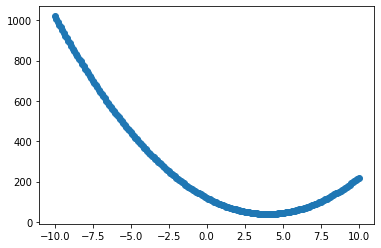

In [5]:
fig, ax = plt.subplots()

ax.scatter(mean_cands, sse);

By contrast, the median is the point that minimizes the sum of absolute differences.

Proof:

We want to find the point $k$ that minimizes $D(k) = \Sigma^n_{i=1}|x_i-k|$. Taking the derivative, we have:

$D'(k) = \Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|}$.

Now we solve $D'(k) = 0$ for $k$:

Consider the sum $\Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|} = 0$. Ignoring the case where $k = x_i$, each of the addends in this sum is $1$ if $k\geq x_i$ or $-1$ if not. To make this sum equal to 0, we thus want to choose $k$ such that there are the same number of $1$s and $-1$s, which means that we want to choose $k$ to be the middle number, i.e. the median.

Notes:
- if $n$ is odd, then the minimum of the function occurs not where its derivative is 0 but where it is *undefined*;
- if $n$ is even, then *any* number between the two middle numbers will minimize our function:

In [6]:
fake_data = np.array([3, 4, 5, 6])
def d_prime(data, k):
    if k not in data:
        return sum((k-data) / abs(k-data))


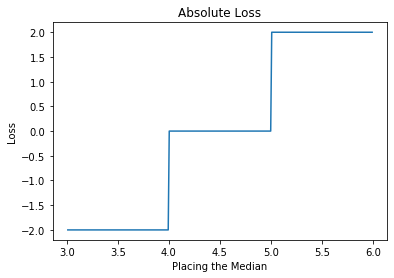

In [7]:
fig, ax = plt.subplots()
K = np.linspace(3, 6, 300)
y = [d_prime(fake_data, k) for k in K]
ax.plot(K, y)
plt.title('Absolute Loss')
plt.xlabel('Placing the Median')
plt.ylabel('Loss');

By conventional defintion of the median, we take the arithmetic mean of the two middle numbers.

In [8]:
med_cands = mean_cands

sae = [sum([abs(x - cand) for x in X]) for cand in med_cands]

min(sae), sae.index(min(sae))

(11.0, 130)

This index of 130 corresponds to -10 + 13 = 3, which is our median!

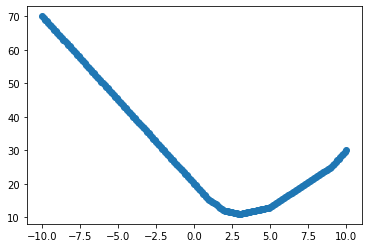

In [9]:
fig, ax = plt.subplots()

ax.scatter(med_cands, sae);

In [11]:
data

array([5, 5, 3, 4, 2, 5, 7, 8, 8, 1, 2])

In [10]:
counts = np.unique(data, return_counts=True)
counts

(array([1, 2, 3, 4, 5, 7, 8]), array([1, 2, 1, 1, 3, 1, 2]))

Another natural question is about the **spread** of the data.

The most common way of measuring this is via the standard deviation, which is a kind of measure of the "average distance from the mean": $\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$.

Notice that the mean is related to $\Sigma(x_i - \bar{x})$ while the standard deviation is related to $\Sigma(x_i - \bar{x})^2$. We could consider higher exponents as well. For each exponent $n>0$, we can define a related statistical **moment**. For $n=3$, the moment is called the **skewness**, which is a measure of how the mean and median diverge. For $n=4$, the moment is called the **kurtosis**, which is a measure of how many values are relatively far from the mean.

For more on statistical moments, see [here](https://www.statisticshowto.datasciencecentral.com/what-is-a-moment/) and [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

One might also ask about the general **shape** or **distribution** of the data. Are most data points clustered around the mean? Are they distributed symmetrically? Is the mean actually not very common? Let's look at some examples:

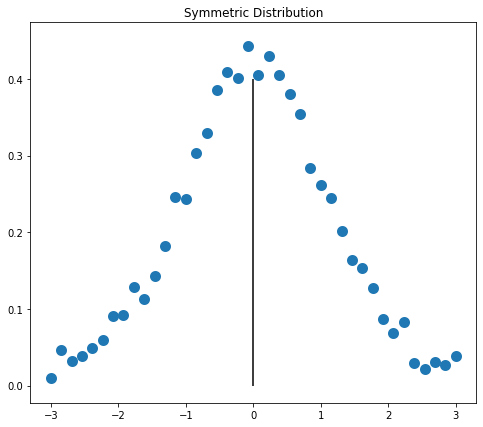

In [12]:
X = np.linspace(-3, 3, 40)
y = stats.norm.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X, y, lw=5)
ax.vlines(x=0, ymin=0, ymax=0.4)
plt.title('Symmetric Distribution');

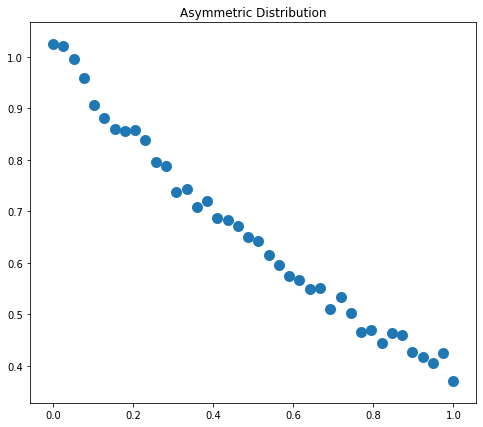

In [13]:
X = np.linspace(0, 1, 40)
y = stats.expon.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X, y, lw=5)
plt.title('Asymmetric Distribution');

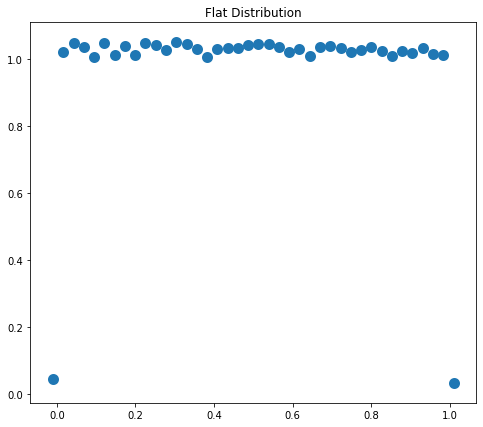

In [14]:
X = np.linspace(-0.01, 1.01, 40)
y = stats.uniform.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X, y, lw=5)
plt.title('Flat Distribution');

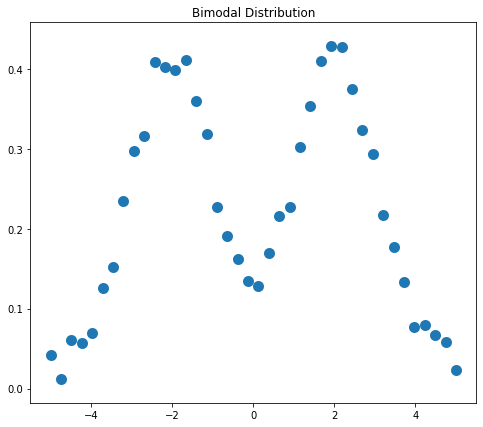

In [15]:
X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X, y, lw=5)
plt.title('Bimodal Distribution');

## Histograms

One natural way of visualizing a dataset is to construct a histogram, which is a simple count of the different values existing in the dataset.

Very often there will be many, many distinct values, especially if the dimension in question is a continuum. In that case, one will often need to make a decision about how many **bins** to use in constructing the histogram, i.e. about how to group the different values.

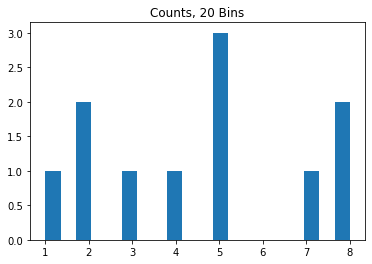

In [16]:
fig, ax = plt.subplots()
ax.hist(data, bins=20)
plt.title('Counts, 20 Bins');

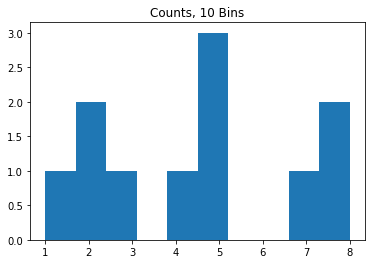

In [21]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins');

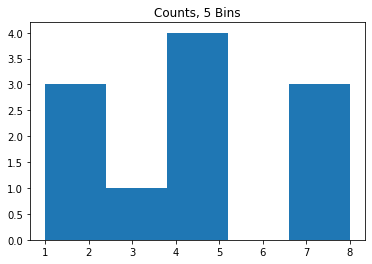

In [18]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins');

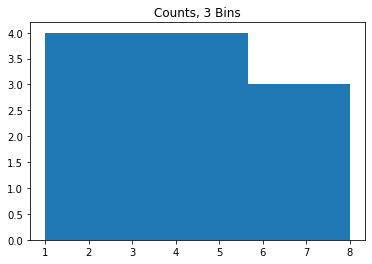

In [19]:
fig, ax = plt.subplots()
ax.hist(data, bins=3)
plt.title('Counts, 3 Bins');

## Sklearn.datasets

Sklearn's datasets module has lots of tools to generate your own (fake) data. These can be very useful when evaluating a model.

In [22]:
X, c = make_blobs(random_state=42)

In [27]:
c

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

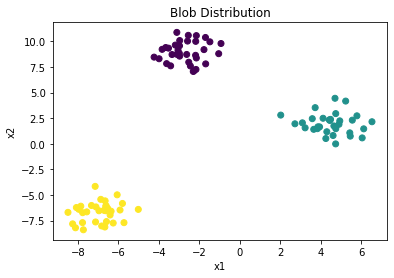

In [28]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Blob Distribution');

In [34]:
x1, x2 = X[:, 0], X[:, 1]

In [33]:
# Let's describe x1 and x2 in statistical terms!

print(f"The maximum of x1 is {x1.max()}.")
print(f"The average of x1 is {x1.mean()}.")
print(f"The minimum of x1 is {x1.min()}.")
print(f"The standard deviation of x1 is {x1.std()}.")
print(f"The interquartile range of x1 is \
{np.percentile(x1, q=75) - np.percentile(x1, q=25)}.")

The maximum of x1 is 6.526064737438632.
The average of x1 is -1.7162792045591917.
The minimum of x1 is -8.487110425712498.
The standard deviation of x1 is 4.78019279035566.
The interquartile range of x1 is 10.272947443608192.


In [35]:
print(f"The maximum of x2 is {x2.max()}.")
print(f"The average of x2 is {x2.mean()}.")
print(f"The minimum of x2 is {x2.min()}.")
print(f"The standard deviation of x2 is {x2.std()}.")
print(f"The interquartile range of x2 is\
{np.percentile(x2, q=75) - np.percentile(x2, q=25)}.")

The maximum of x2 is 10.86656431270726.
The average of x2 is 1.474850767353032.
The minimum of x2 is -8.39495681796181.
The standard deviation of x2 is 6.47257305323962.
The interquartile range of x2 is14.40746345577579.


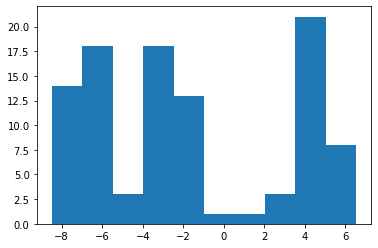

In [36]:
fig, ax = plt.subplots()
ax.hist(x1);

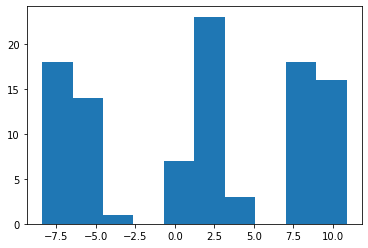

In [37]:
fig, ax = plt.subplots()
ax.hist(x2);

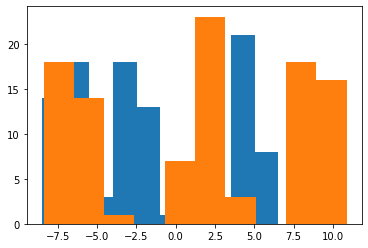

In [38]:
fig, ax = plt.subplots()
ax.hist(x1)
ax.hist(x2);

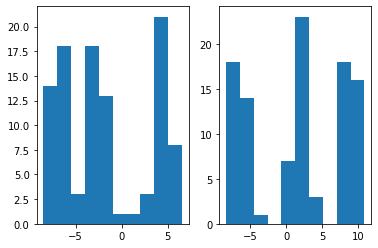

In [39]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(x1)
ax[1].hist(x2);

In [40]:
df = pd.DataFrame(np.concatenate([X, c.reshape(-1, 1)], axis=1),
                  columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,-7.726421,-8.394957,2.0
1,5.453396,0.742305,1.0
2,-2.978672,9.556846,0.0
3,6.042673,0.571319,1.0
4,-6.521840,-6.319325,2.0


In [41]:
df['y'] = df['y'].astype(int)

In [42]:
df.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,-1.716279,1.474851,0.990000
std,4.804275,6.505181,0.822598
min,-8.487110,-8.394957,0.000000
25%,-6.435252,-6.094340,0.000000
50%,-2.603027,1.922690,1.000000
75%,3.837695,8.313123,2.000000
max,6.526065,10.866564,2.000000


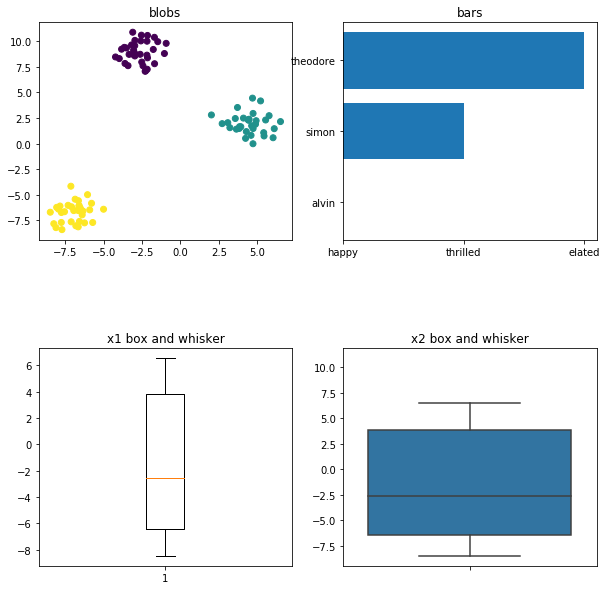

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # gives you more space between rows
ax[0][0].title.set_text('blobs')
ax[0][0].scatter(x1, x2, c=c);
ax[0][1].title.set_text('bars')
ax[0][1].barh(['alvin', 'simon', 'theodore'], ['happy', 'thrilled', 'elated'])
ax[1][0].title.set_text('x1 box and whisker')
ax[1][0].boxplot(x1)
ax[1][1].title.set_text('x2 box and whisker')
ax[1][1].boxplot(x2);

sns.boxplot(x1, orient='v')

## Regression Plot

In [51]:
P, T = make_regression(n_features=1, noise = 20)

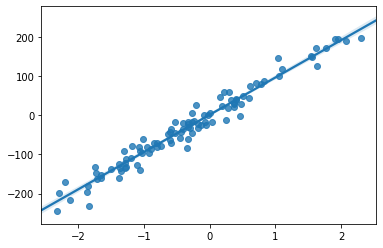

In [52]:
sns.regplot(P, T);

## Rock Music Data

Let's see what stats or graphs we can pull out of this dataset about rock songs.

In [53]:
songs = pd.read_csv('classic-rock-song-list.csv')
songs.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


We could make a histogram of the song play counts:

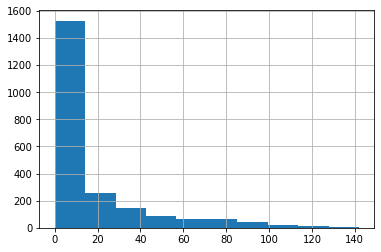

In [56]:
songs['PlayCount'].sort_values().hist();

We might also try grouping by artist:

In [57]:
songs.groupby('ARTIST CLEAN').count()['Song Clean'].sort_values(ascending=False)

nums_sorted = songs.groupby('ARTIST CLEAN')\
.count()['Song Clean'].sort_values(ascending=False)

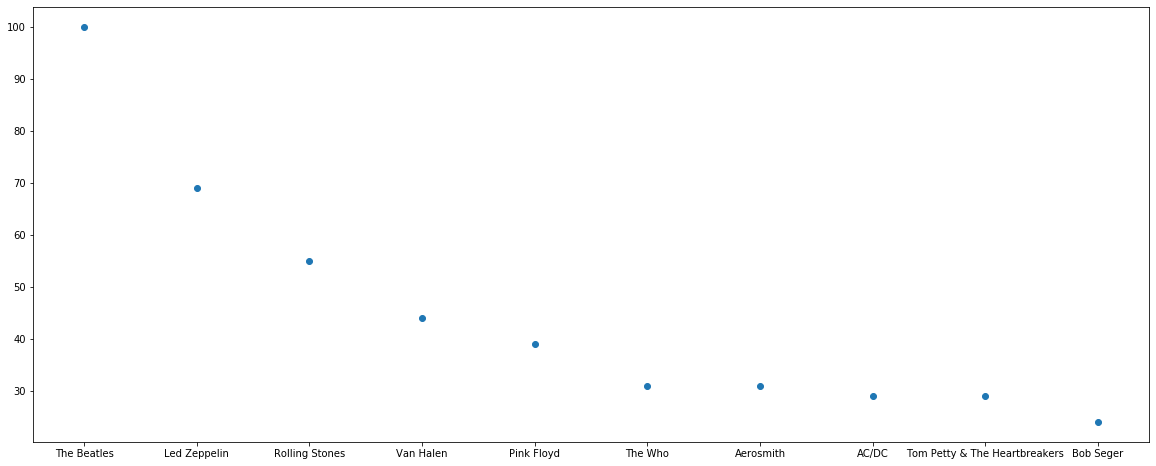

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(nums_sorted[:10].index, nums_sorted[:10]);

In [59]:
nums_sorted.skew()

5.6284210275083115

In [60]:
nums_sorted.kurt()

47.75001636743932

## The Iris Dataset

In [61]:
data = load_iris()

In [62]:
X = data.data
y = data.target

In [64]:
# print(data.DESCR)

In [76]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]),
                  columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'spec'])

In [77]:
df

,sepal_len,sepal_wid,petal_len,petal_wid,spec
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [78]:
df['spec'] = df['spec'].astype(int)

In [79]:
cypher = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['spec'] = df['spec'].map(cypher)
df

,sepal_len,sepal_wid,petal_len,petal_wid,spec
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## More Seaborn Tools

### Categorical Plots

#### Swarm Plot

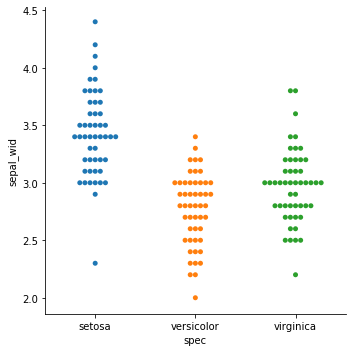

In [80]:
sns.catplot(x="spec", y="sepal_wid",
            kind='swarm', data=df);

#### Violin Plot

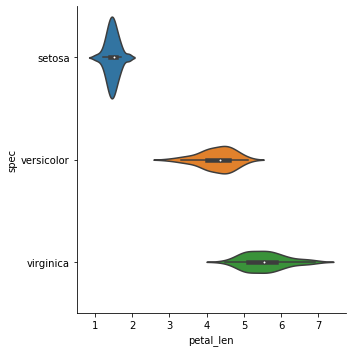

In [81]:
sns.catplot(x='petal_len', y='spec',
            kind='violin', data=df);

#### Point Plot

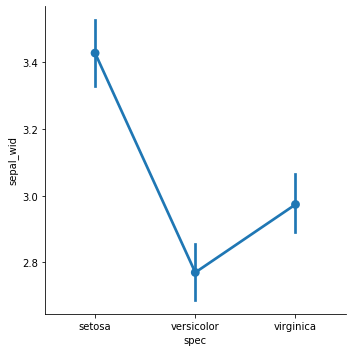

In [82]:
sns.catplot(x='spec', y='sepal_wid',
           kind='point', data=df);

### Relational Plot

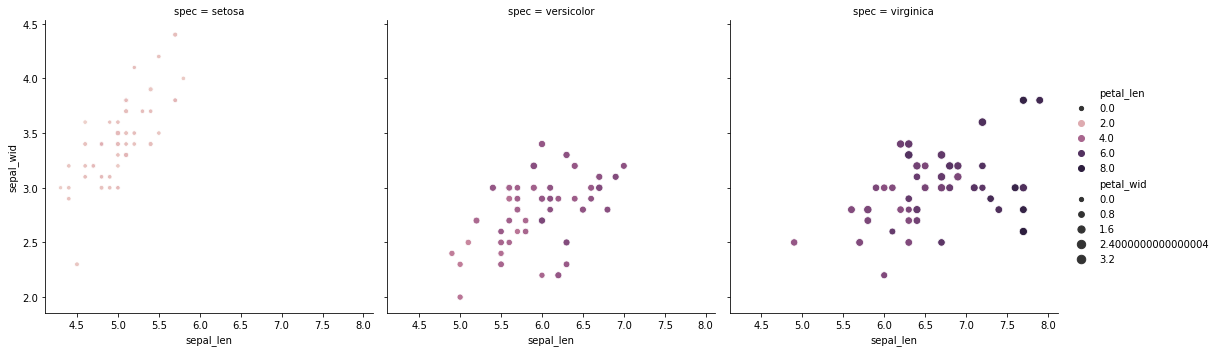

In [83]:
sns.relplot(x="sepal_len", y="sepal_wid", col="spec",
            hue="petal_len", size="petal_wid",
            data=df);

